# Pymaceuticals Inc.
---

### Analysis


Based on the summary statistics table, it seems like Capomulin and Ramicane regimens are the most promising treatments to be studied further. They have the lowest mean tumor volumes with 40.68 and 40.22, respectively, while also having the smallest variance values with 24.95 and 23.49. This indicates that they are consistently the most helpful regimens towards decreasing the tumor size. The bar graphs also show that these two treatments were studied on the greatest number of mice, which could have affected the overall statistic data. It is possible that if more mice were studied on other regimens, the regimens could prove to be more effective, as there could be differences in the data due to the samples of mice being studied. This is interesting to note as the weights of the mice seem to also have had a large effect on the tumor size based on the correlation plot between weight and tumor volume for the Capomulin treated mice. The r value is .84, indicating a strong positive relationship. In further studies it will be important to control for weight to make sure that the drug regimens are all tested on similar mice. This ensures that the data is not being skewed by other factors the besides the efficacy of the treatment regimens.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

df['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = mouse_study[mouse_study['Mouse ID']=='g989']
g989_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = mouse_study[mouse_study['Mouse ID'] != 'g989']
cleandf.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleandf["Mouse ID"].value_counts())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

from scipy.stats import sem
drug_group_data = cleandf.groupby('Drug Regimen')
mean_tumor_volume = drug_group_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_group_data['Tumor Volume (mm3)'].median()
tumor_volume_var = drug_group_data['Tumor Volume (mm3)'].var()
tumor_volume_std = drug_group_data['Tumor Volume (mm3)'].std()
tumor_volume_sem = drug_group_data['Tumor Volume (mm3)'].sem()

    
drug_tumor_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, 
                              "Tumor Volume Variance": tumor_volume_var,
                              "Tumor Volume Std. Dev.": tumor_volume_std,
                              "Tumor Volume Std Error": tumor_volume_sem})
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

cleandf.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

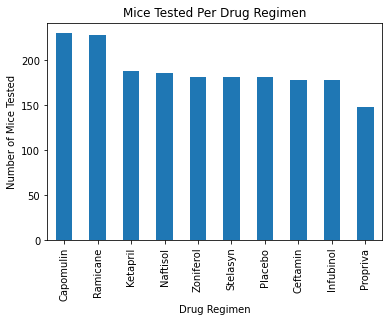

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug = cleandf['Drug Regimen'].value_counts()
mice_per_drug.plot(kind = 'bar', title='Mice Tested Per Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.show()

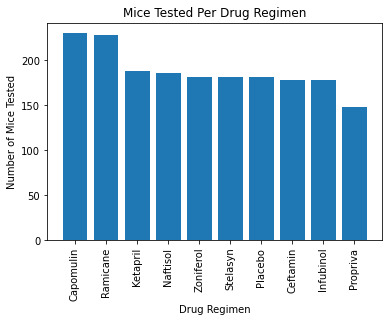

In [11]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
druglist = mice_per_drug.index
x_axis = np.arange(len(druglist))
plt.bar(x_axis, mice_per_drug, align = 'center')
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, druglist, rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Mice Tested Per Drug Regimen')
plt.show()

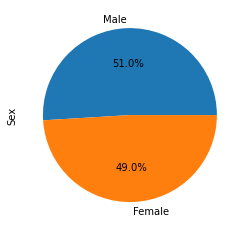

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts1 = cleandf['Sex'].value_counts()
sex_counts1.plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

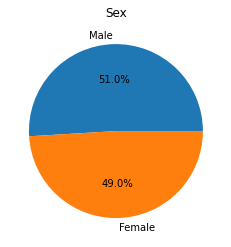

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piedata = cleandf['Sex'].value_counts()
pielabels = piedata.index

plt.pie(piedata, labels=pielabels, autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mousegroups = cleandf.groupby('Mouse ID')
timepoints = mousegroups.max()[['Timepoint']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge2 = pd.merge(cleandf, timepoints, on= ['Mouse ID', 'Timepoint'], how = 'inner')
merge2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
for drug in treatments:
    drug_volumes =merge2[merge2['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volumes.append(drug_volumes)
    
    quartiles = drug_volumes.quantile([0.25,.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5

    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    
    # Determine outliers using upper and lower bounds
    outliers = drug_volumes[(drug_volumes>upper_bound) | (drug_volumes<lower_bound) ]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


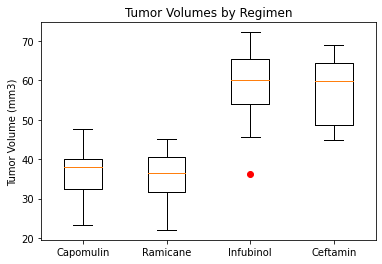

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes by Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes, 0, 'r', labels = treatments)
plt.show()

## Line and Scatter Plots

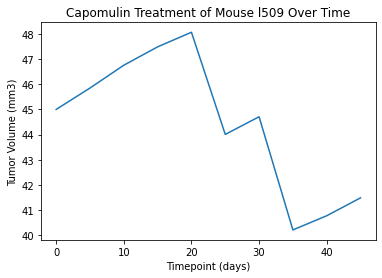

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = cleandf[cleandf['Mouse ID']=='l509']
plt.plot(l509_df['Timepoint'], l509_df['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509 Over Time')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

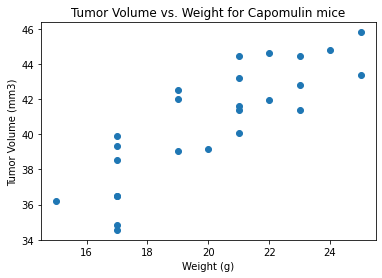

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = mousegroups.mean()['Tumor Volume (mm3)']
capomulin_data = cleandf[cleandf["Drug Regimen"]=='Capomulin']
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Weight for Capomulin mice')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694718


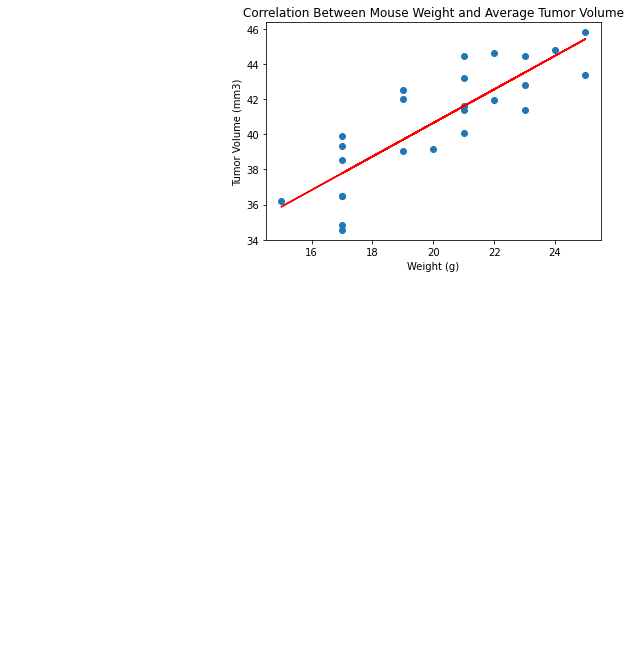

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Correlation Between Mouse Weight and Average Tumor Volume')
plt.show()
